tasks:
1.Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2.Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd 
import numpy as np

dete_survey=pd.read_csv('dete_survey.csv',na_values='Not Stated')  #Not stated=NAN
tafe_survey=pd.read_csv('tafe_survey.csv')

dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [2]:
#explore the data
print(dete_survey.isnull().sum())
print(tafe_survey.isnull().sum())
dete_survey.shape
tafe_survey.shape


ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

(702, 72)

###Drop some useless columns

In [3]:
#Drop the columns using index number instead of the string
#.shape the way to check how many the columns are.
print(tafe_survey.columns.shape)
tafe_survey_updated=tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)
print(tafe_survey_updated.columns.shape)

(72,)
(23,)


In [4]:
dete_survey_updated.columns=dete_survey_updated.columns.str.strip().str.replace(' ','_').str.lower()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [5]:
tafe_change_name={'Record ID':'id',
'CESSATION YEAR':'cease_date',
'Reason for ceasing employment':'separationtype',
'Gender. What is your Gender?':'gender',
'CurrentAge. Current Age':'age',
'Employment Type. Employment Type':'employment_status',
'Classification. Classification':'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}
tafe_survey_updated.rename(tafe_change_name,axis=1,inplace=True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

###check the reason of the resignation
1. taking advantage of contain() to filter the series 'separationtype' with any words of resignation
2. another way is using 

dete_survey_updated['separationtype']=dete_survey_updated['separationtype'].str.split('-').str[0]
dete_survey_updated['separationtype']
dete_resignations=dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()
dete_resignations

In [6]:
#filter the resination in seperationtype
dete_survey_updated['separationtype'].value_counts()
pattern=r'Resignation'
dete_resignation=dete_survey_updated['separationtype'].str.contains(pattern)
dete_resignation_df=dete_survey_updated[dete_resignation].copy()
#dete_resignation_df.shape


tafe_resignation=tafe_survey_updated['separationtype'].str.contains(pattern,na=False)
tafe_resignation_df=tafe_survey_updated[tafe_resignation]
print(tafe_resignation_df.shape)
print(tafe_survey_updated['separationtype'].value_counts())

(340, 23)
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


###
In this step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense


In [11]:
# delete the wrong ones, then having some mistakes, but actually this is right 
dete_resignation_df['cease_date'].value_counts().sort_values()
dete_resignation_df['cease_date']=dete_resignation_df['cease_date'].str.split('/').str[-1] #some ints inside, but it is working on string with \
dete_resignation_df['cease_date']=dete_resignation_df['cease_date'].astype(float)


In [8]:
dete_resignation_df['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [13]:
#calculate the period of the time
dete_resignation_df['institute_service']=dete_resignation_df['cease_date']-dete_resignation_df['dete_start_date']
# print(dete_resignation_df.head()
dete_resignation_df['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

In [ ]:
tafe_resignation_df.columns   #check the columns

In [ ]:
tafe_resignation_df['Contributing Factors. Dissatisfaction'].value_counts()
tafe_resignation_df['Contributing Factors. Job Dissatisfaction'].value_counts()

In [14]:

def comparsion(value):
    if value=='-':
        return False
    elif pd.isnull(value):
        return np.nan
    else:
        return True
col=['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']
tafe_resignation_df[col]=tafe_resignation_df[col].applymap(comparsion)
tafe_resignation_df['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

D:\Anaconda3\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [17]:
## df.any()is the way to compare series in the df, one of them is true, which would be true

tafe_resignation_df['dissatisfied']=tafe_resignation_df[col].any(axis=1,skipna=False)
tafe_resignation_df['dissatisfied'].value_counts(dropna=False)

<ipython-input-17-0229b7936ca6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tafe_resignation_df['dissatisfied']=tafe_resignation_df[col].any(axis=1,skipna=False)


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [ ]:
tafe_resignations_up = tafe_resignation_df.copy()


In [ ]:
dete_resignation_df['job_dissatisfaction'].value_counts()

In [ ]:
dete_resignation_df['dissatisfaction_with_the_department'].value_counts()

In [18]:
cols=['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']

dete_resignation_df['dissatisfied']=dete_resignation_df[cols].any(axis=1,skipna=False)
dete_resignation_df['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [24]:
dete_resignations_up = dete_resignation_df.copy()
tafe_resignations_up=tafe_resignation_df.copy()

In [25]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"
combined=pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index=False)

In [26]:
combined.notnull().sum()
combined_updated=combined.dropna(thresh=500,axis=1)
combined_updated.isnull().sum()

id                    0
separationtype        0
cease_date           16
position             53
employment_status    54
gender               59
age                  55
institute_service    88
dissatisfied          8
institute             0
dtype: int64

In [27]:
combined_updated['institute_service'].value_counts().sort_values()


38.0                   1
27.0                   1
29.0                   1
31.0                   1
33.0                   1
49.0                   1
41.0                   1
35.0                   1
42.0                   1
34.0                   1
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
21.0                   3
32.0                   3
39.0                   3
19.0                   3
24.0                   4
11.0                   4
23.0                   4
16.0                   5
18.0                   5
10.0                   6
17.0                   6
22.0                   6
12.0                   6
14.0                   6
20.0                   7
15.0                   7
13.0                   8
8.0                    8
More than 20 years    10
7.0                   13
9.0                   14
2.0                   14
4.0                   16
6.0                   17
0.0                   20


In [28]:
###important 
## r'(\d+)'is we’re capturing any groups of digit characters in the string. Without the +, we’d still be capturing all the digits, but since \d represents just a single character, we’d be pulling a bunch of single character groups instead.
combined_updated['institute_service_up']=combined_updated['institute_service'].astype('str').str.extract(r'(\d+)').copy()
combined_updated['institute_service_up']=combined_updated['institute_service_up'].astype('float').copy()
combined_updated['institute_service_up'].value_counts()

<ipython-input-28-b0e7634f5f7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service_up']=combined_updated['institute_service'].astype('str').str.extract(r'(\d+)').copy()
<ipython-input-28-b0e7634f5f7f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service_up']=combined_updated['institute_service_up'].astype('float').copy()


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [33]:
def level_of_service(val):
    if val>=11:
        return 'Veteran'
    elif 7<=val<11:
        return 'Established'
    elif 3<=val<7:
        return 'Experienced'
    elif pd.isnull(val):       #be careful, should consider nan
        return np.nan
    else:
        return 'New'
combined_updated['service_cat']=combined_updated['institute_service_up'].apply(level_of_service)

<ipython-input-33-bff883ec1c21>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat']=combined_updated['institute_service_up'].apply(level_of_service)


In [36]:
combined_updated['service_cat'].value_counts().sort_values()

Established     62
Veteran        136
Experienced    172
New            193
Name: service_cat, dtype: int64

In [37]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [39]:
combined_updated['dissatisfied']=combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts()

<ipython-input-39-d71740b2dc4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['dissatisfied']=combined_updated['dissatisfied'].fillna(False)


False    411
True     240
Name: dissatisfied, dtype: int64

In [40]:
a = pd.pivot_table(combined_updated,index='service_cat', values='dissatisfied')
a

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


<AxesSubplot:xlabel='service_cat'>

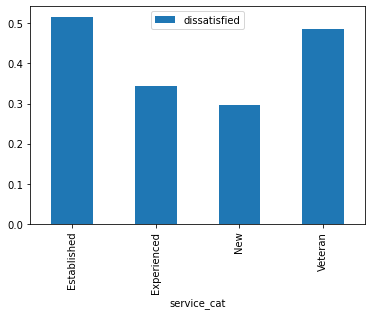

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
a.plot(kind='bar')